<a href="https://colab.research.google.com/github/emy-mhmd/SHAI_assignment/blob/main/Copy_of_ShAI_BootCamp_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [2]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/shai for ai/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

 number of rows and columns in the dataset,

In [4]:
rows,columns=df.shape
print(f'number of rows:{rows}')
print(f'number of culumns:{columns}')

number of rows:148654
number of culumns:13


the data types of each column

In [5]:
data_type=df.dtypes
print(f'data type of each coulumn is:{data_type}')

data type of each coulumn is:Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


 check for missing values in each column

In [6]:
missing_values=df.isnull().sum()
print(f'missing values in each column is:{missing_values}')

missing values in each column is:Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [8]:
mean=df['TotalPay'].mean()
median=df['TotalPay'].median()
mode=df['TotalPay'].mode()
minimum=df['TotalPay'].min()
maximum=df['TotalPay'].max()
range=maximum-minimum
sd=df['TotalPay'].std()
print(f'mean is:{mean}')
print(f'median is:{median}')
print(f'mode is:{mode}')
print(f'minimum is:{minimum}')
print(f'maximum is:{maximum}')
print(f'range is:{range}')
print(f'std is:{sd}')

mean is:74768.32197169267
median is:71426.60999999999
mode is:0    0.0
Name: TotalPay, dtype: float64
minimum is:-618.13
maximum is:567595.43
range is:568213.56
std is:50517.00527394987


missing data by suitable method
know the two coulmns i will handle the missing data in it are BasePay and Benefits and i will leave OvertimePay ,OtherPay because the NAN value is only 4 and that willn't effect the data that much while Notes ,Status  can be leaved or dropped as these two coulmns have no values at all and it doesn't affect the analysis of the salaries
the basepay i will replace it by the mean or the median and the benefits i will replace it by 0

know to decide whether i will replace the basepay by the mean or the median i have to see the destrubution of the basepay an its outliers

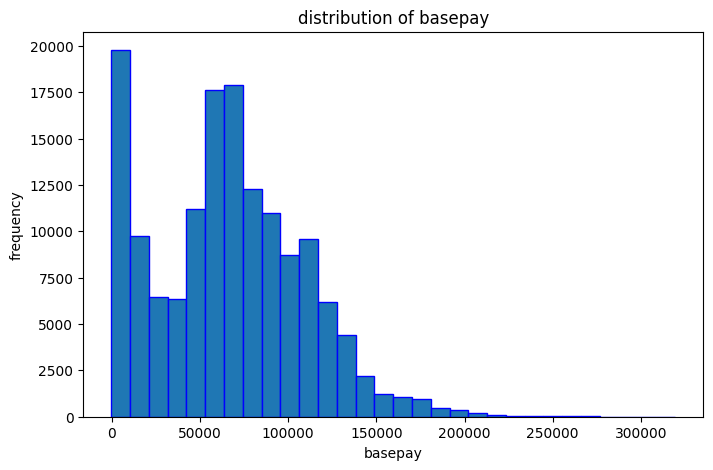

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df['BasePay'],bins=30,edgecolor='blue')
plt.title('distribution of basepay')
plt.xlabel('basepay')
plt.ylabel('frequency')
plt.show()

ok know after plotting the basepay we can see that the frequency when the basepay is zero is very heigh and the diagram is skewed that mean using the median is better than the mean

In [10]:
df['BasePay'].fillna(df['BasePay'].median(),inplace=True)
df['Benefits'].fillna(0,inplace=True)
df.drop(columns=['Notes'],inplace=True)
df.drop(columns=['Status'],inplace=True)
print(df.isnull().sum())

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         4
OtherPay            4
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


 histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.



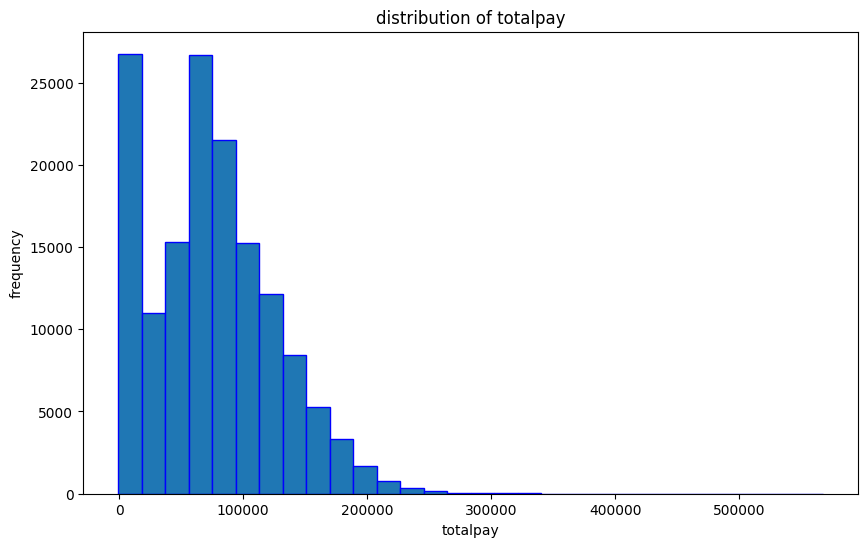

In [18]:
plt.figure(figsize=(10,6))
plt.hist(df['TotalPay'],bins=30,edgecolor='blue')
plt.title('distribution of totalpay')
plt.xlabel('totalpay')
plt.ylabel('frequency')
plt.show()

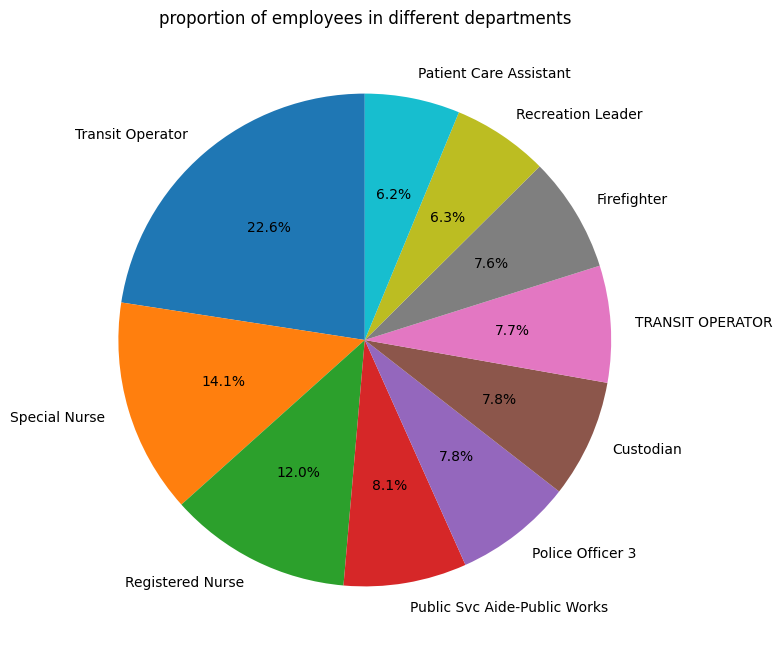

In [12]:
plt.figure(figsize=(8,8))
job_title=df['JobTitle'].value_counts()
top=job_title.head(10)
plt.pie(top,labels=top.index,autopct='%1.1f%%', startangle=90)
plt.title('proportion of employees in different departments')
plt.show()

Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

In [13]:
group_data=df.groupby('JobTitle')['TotalPay'].agg(['count','mean','median','min','max'])
group_data

,count,mean,median,min,max
JobTitle,,,,,
ACCOUNT CLERK,83,44035.664337,49777.820,614.00,60838.20
ACCOUNTANT,5,47429.268000,60076.240,1148.40,65392.01
ACCOUNTANT INTERN,48,29031.742917,17658.505,2981.53,58799.53
"ACPO,JuvP, Juv Prob (SFERS)",1,62290.780000,62290.780,62290.78,62290.78
ACUPUNCTURIST,1,67594.400000,67594.400,67594.40,67594.40
...,...,...,...,...,...
X-RAY LABORATORY AIDE,26,52705.880385,60333.125,5343.69,85077.40
X-Ray Laboratory Aide,100,50823.942700,60047.290,1007.00,99812.97
"YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS",1,53632.870000,53632.870,53632.87,53632.87


In [14]:
average_salary=group_data.sort_values(by='mean',ascending=False)
print(f"average salary across different jobs:{average_salary['mean']}")

average salary across different jobs:JobTitle
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275000
Chief Investment Officer                          339653.700000
Chief of Police                                   329183.646667
Chief, Fire Department                            325971.683333
DEPUTY DIRECTOR OF INVESTMENTS                    307899.460000
                                                      ...      
Commissioner 16.700c, No Pay                          25.760000
IS Technician Assistant                                0.000000
Not provided                                           0.000000
Public Safety Comm Tech                                0.000000
Drug Court Coordinator                                 0.000000
Name: mean, Length: 2159, dtype: float64


correlation between salary and basepay column, and plot a scatter plot to visualize the relationship.

correlation_matric:          TotalPay   BasePay
TotalPay  1.000000  0.950689
BasePay   0.950689  1.000000


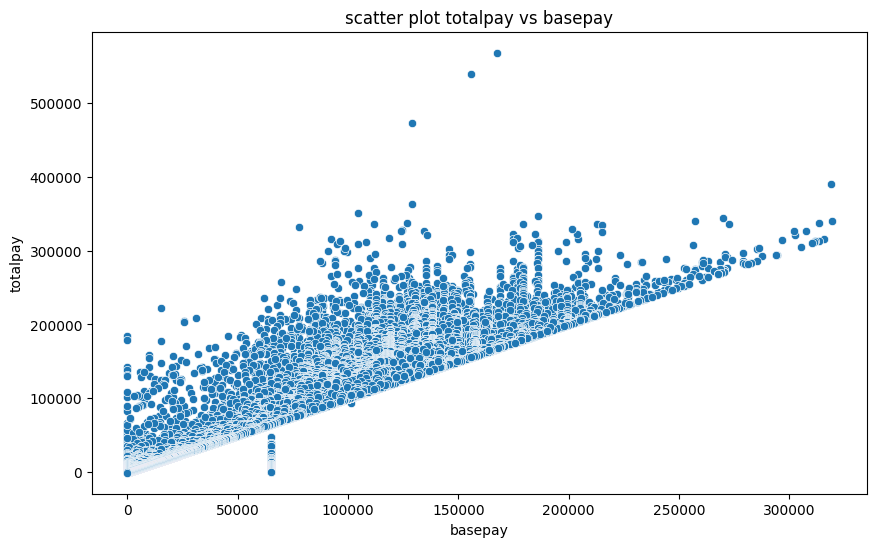

In [15]:
import seaborn as sns
correlation_matrix=df[['TotalPay','BasePay']].corr()
print(f"correlation_matric:{correlation_matrix}")
plt.figure(figsize=(10,6))
sns.scatterplot(x='BasePay',y='TotalPay',data=df)
plt.title('scatter plot totalpay vs basepay')
plt.xlabel('basepay')
plt.ylabel('totalpay')
plt.show()


as we can see the correlation matrix is one so that mean it is positive linear relationship which means when the basepay increase the totalpay also increase

# Good Luck!